<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


*   Visualize the distribution of data.

*   Visualize the relationship between two features.

*   Visualize composition of data.

*   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2022-08-26 09:58:53--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.1’

m4_survey_data.sqli 100%[===================>]  34.98M  32.7MB/s    in 1.1s    

2022-08-26 09:58:55 (32.7 MB/s) - ‘m4_survey_data.sqlite.1’ saved [36679680/36679680]



Connect to the database.


In [ ]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [ ]:
import pandas as pd

## Demo: How to run an sql query


In [ ]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [ ]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


In [ ]:
QUERY = """
SELECT WebFrameWorkedWith, count(*) as number
FROM WebFrameWorkedWith
group by WebFrameWorkedWith
order by number desc
"""
df = pd.read_sql_query(QUERY,conn)
df.head(10)

,WebFrameWorkedWith,number
0,jQuery,4629
1,Angular/Angular.js,3327
2,React.js,3302
3,ASP.NET,3042
4,Express,2028
5,Spring,1728
6,Vue.js,1485
7,Flask,1186
8,Django,1176
9,Laravel,939


In [ ]:
QUERY = """
SELECT WebFrameDesireNextYear, count(*) as number
FROM WebFrameDesireNextYear
group by WebFrameDesireNextYear
order by number desc
"""
df = pd.read_sql_query(QUERY,conn)
df.head(10)

,WebFrameDesireNextYear,number
0,React.js,4714
1,Vue.js,3143
2,Angular/Angular.js,3059
3,ASP.NET,2382
4,jQuery,2241
5,Express,1957
6,Spring,1564
7,Django,1504
8,Flask,1240
9,Ruby on Rails,970


## Demo: How to run a group by query


In [ ]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [ ]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


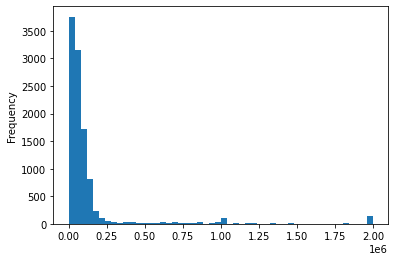

In [ ]:
# your code goes here
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

QUERY = """
SELECT ConvertedComp
FROM master
"""
df_hist = pd.read_sql_query(QUERY,conn)
df_hist['ConvertedComp'].plot(kind='hist', bins = 50)

### Box Plots


Plot a box plot of `Age.`


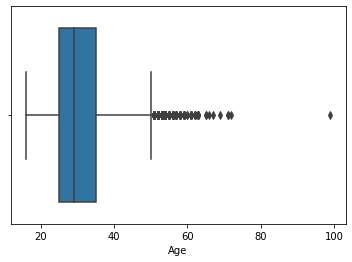

In [ ]:
# your code goes here

QUERY = """
SELECT Age
FROM master
"""

df_box = pd.read_sql_query(QUERY, conn)
#df_box['Age'].plot(kind='box')
sns.boxplot(x =df_box['Age'])

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


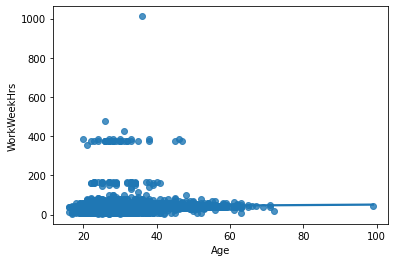

In [ ]:
# your code goes here

QUERY = """
SELECT Age, WorkWeekHrs
FROM master
"""
df_scatter = pd.read_sql_query(QUERY, conn)
#df_scatter.plot(kind='scatter', x='Age', y='WorkWeekHrs', figsize=(10, 8))
sns.regplot(x='Age', y='WorkWeekHrs', data = df_scatter)
plt.show()

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


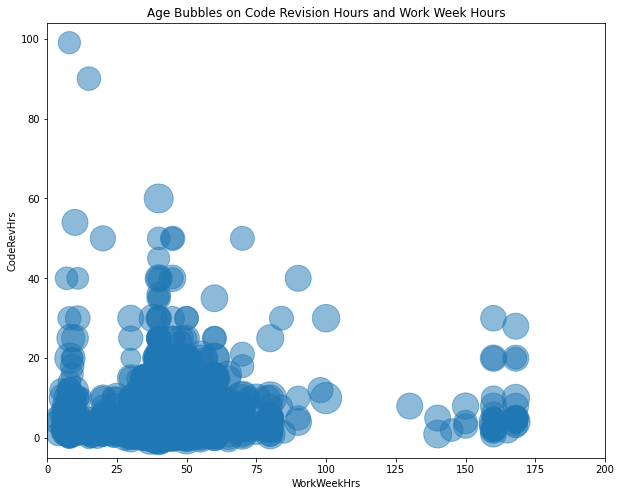

In [ ]:
# your code goes here

QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs
FROM master
"""

df_bubble = pd.read_sql_query(QUERY, conn)
norm_age = (df_bubble['Age']/df_bubble['Age'].min())/(df_bubble['Age'].max()/df_bubble['Age'].min())

df_bubble.plot(kind='scatter', x='WorkWeekHrs', y='CodeRevHrs', alpha=0.5, s=norm_age*2000 + 10, figsize=(10, 8), xlim=(0, 200))

plt.title('Age Bubbles on Code Revision Hours and Work Week Hours')
plt.xlabel('WorkWeekHrs')
plt.ylabel('CodeRevHrs')

plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


<function matplotlib.pyplot.show(*args, **kw)>

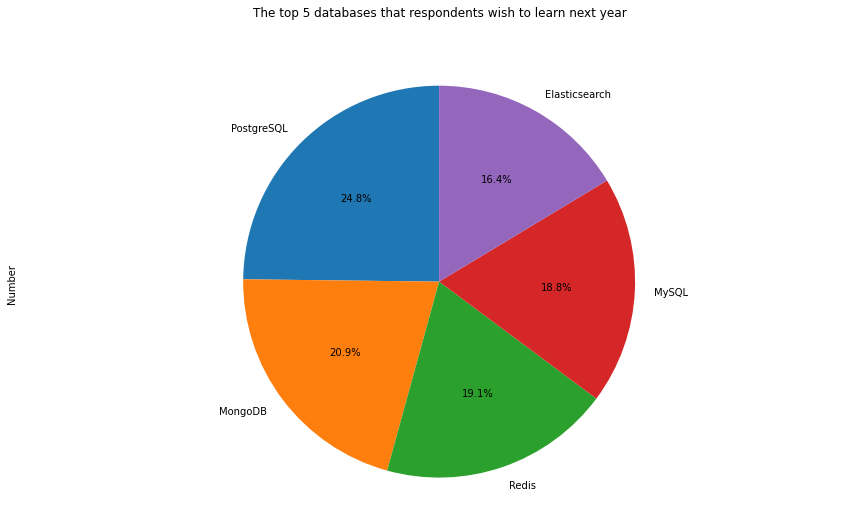

In [ ]:
# your code goes here

QUERY = """
SELECT DatabaseDesireNextYear, count(*) AS Number
FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear
ORDER BY Number DESC
"""

df = pd.read_sql_query(QUERY, conn)
df_pie = df.head(5)
df_pie.set_index('DatabaseDesireNextYear', inplace=True)

df_pie['Number'].plot(kind='pie', figsize=(15, 8), autopct='%1.1f%%', startangle=90, shadow=False, labels=df_pie.index)

plt.title('The top 5 databases that respondents wish to learn next year', y=1.1)
plt.axis('equal')
plt.show


In [ ]:
# In the list of most popular languages respondents wish to learn next year, what is the rank of Python?

QUERY = """
SELECT LanguageDesireNextYear, count(*) as Number
FROM LanguageDesireNextYear
GROUP BY LanguageDesireNextYear
ORDER BY Number DESC
"""

df = pd.read_sql_query(QUERY, conn)
df.head()

,LanguageDesireNextYear,Number
0,JavaScript,6630
1,HTML/CSS,5328
2,Python,5239
3,SQL,5012
4,TypeScript,4088


In [ ]:
# How many respondents indicated that they currently work with 'SQL'? 
QUERY = """
SELECT LanguageWorkedWith, count(*) as Number
FROM LanguageWorkedWith
GROUP BY LanguageWorkedWith
ORDER BY Number DESC
"""

df = pd.read_sql_query(QUERY, conn)
df.head()

,LanguageWorkedWith,Number
0,JavaScript,8687
1,HTML/CSS,7830
2,SQL,7106
3,Bash/Shell/PowerShell,4642
4,Python,4542


In [ ]:
# How many respondents indicated that they work on 'MySQL' only? 

QUERY = """
SELECT Respondent, count(*) AS Number
FROM DatabaseWorkedWith
GROUP BY Respondent
HAVING Number = 1 AND DatabaseWorkedWith = 'MySQL'
"""

df = pd.read_sql_query(QUERY,conn)
my_sql_num = df.shape[0]

print(f"Number of respondents who indicated that they work on 'MySQL' only: {my_sql_num}")

Number of respondents who indicated that they work on 'MySQL' only: 474


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


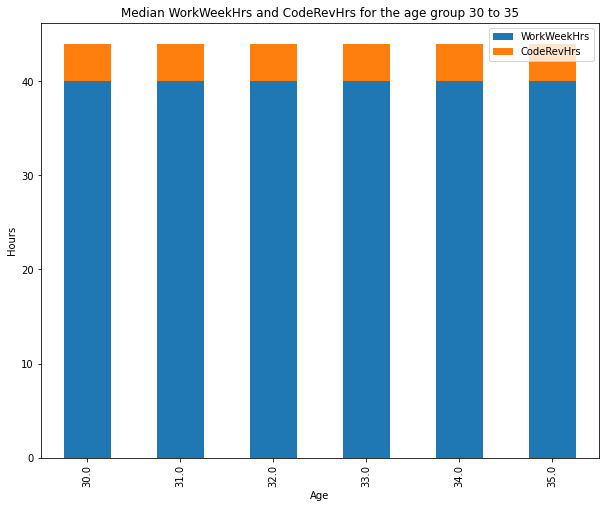

In [ ]:
# your code goes here

QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs
FROM master
WHERE Age BETWEEN 30 and 35
"""

df_stacked = pd.read_sql_query(QUERY, conn)
df_stacked
df_chart = df_stacked.groupby('Age').median()
df_chart

df_chart.plot(kind='bar', figsize=(10, 8), stacked=True)

plt.title('Median WorkWeekHrs and CodeRevHrs for the age group 30 to 35')
plt.xlabel('Age')
plt.ylabel('Hours')
plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


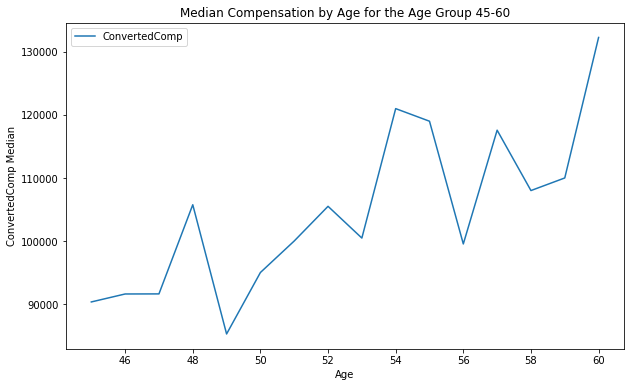

In [ ]:
# your code goes here

QUERY = """
SELECT Age, ConvertedComp
FROM master
WHERE Age BETWEEN 45 AND 60
"""

df = pd.read_sql_query(QUERY, conn)

df_line = df.groupby('Age', axis=0).median()
#df_line

df_line.plot(kind='line', figsize=(10, 6))

plt.title('Median Compensation by Age for the Age Group 45-60')
plt.xlabel('Age')
plt.ylabel('ConvertedComp Median')
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


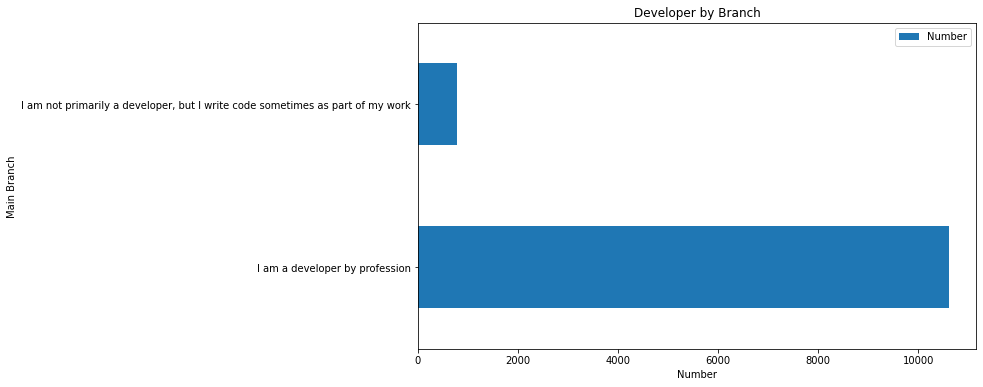

In [ ]:
# your code goes here

QUERY = """
SELECT MainBranch, count(*) AS Number
FROM master
GROUP BY MainBranch
"""

df_h_bar = pd.read_sql_query(QUERY, conn)
df_h_bar.set_index(df_h_bar['MainBranch'], inplace=True)

df_h_bar.plot(kind='barh', figsize=(10, 6), label=df_h_bar.index)

plt.title('Developer by Branch')
plt.xlabel('Number')
plt.ylabel('Main Branch')

plt.show()

In [ ]:
# Majority of the survey responders are

QUERY = """
SELECT DevType, count(*) AS Number
FROM DevType
GROUP BY DevType
ORDER BY Number DESC
"""

df = pd.read_sql_query(QUERY, conn)
df.head()

,DevType,Number
0,"Developer, full-stack",6928
1,"Developer, back-end",6290
2,"Developer, front-end",3920
3,"Developer, desktop or enterprise applications",2575
4,"Developer, mobile",1959


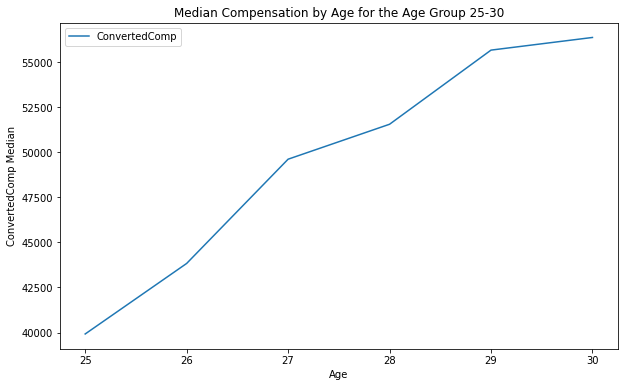

In [ ]:
# Based on the Line Chart of Age and median ConvertedComp for the age group 25-30, what kind of correlation do you see between Age and median ConvertedComp? 

QUERY = """
SELECT Age, ConvertedComp
FROM master
WHERE Age BETWEEN 25 AND 30
"""

df = pd.read_sql_query(QUERY, conn)

df_line = df.groupby('Age', axis=0).median()

df_line.plot(kind='line', figsize=(10, 6))

plt.title('Median Compensation by Age for the Age Group 25-30')
plt.xlabel('Age')
plt.ylabel('ConvertedComp Median')
plt.show()


Close the database connection.


In [ ]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
